## Обработка данных

In [1]:
!pip install lightgbm
!pip install catboost

In [2]:
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.preprocessing import OrdinalEncoder 

C:\Users\EGO\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\linear_model\least_angle.py:30: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  method='lar', copy_X=True, eps=np.finfo(np.float).eps,
C:\Users\EGO\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\linear_model\least_angle.py:167: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-no

In [3]:
pth1 = 'autos.csv'
pth2 = '/datasets/autos.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
    display(df.head())
    print(df.info())
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
    display(df.head())
    print(df.info())
else:
    print('Something is wrong') 

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
print(df.isna().sum())
print('------------------------------------')
print('Количество дубликатов:',  df.duplicated().sum())

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Kilometer                0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64
------------------------------------
Количество дубликатов: 4


In [5]:
df = df.drop_duplicates()

## Предобработка данных

**Price**

<AxesSubplot:xlabel='Price', ylabel='Count'>

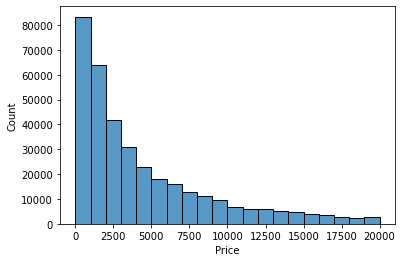

In [7]:
sns.histplot(df['Price'], bins=20)

Проверим сколько людей отдают автомобиль 'бесплатно'

In [8]:
print(len(df[df['Price'] == 0]))

10772


In [9]:
df = df[df['Price'] != 0]

**VehicleType**

In [10]:
df['VehicleType'].value_counts()

sedan          89405
small          78017
wagon          63700
bus            28345
convertible    19865
coupe          15634
suv            11791
other           3086
Name: VehicleType, dtype: int64

Заполним пропуски с помощью 'other'

In [11]:
df['VehicleType'] = df['VehicleType'].fillna('other')

<AxesSubplot:xlabel='VehicleType', ylabel='Count'>

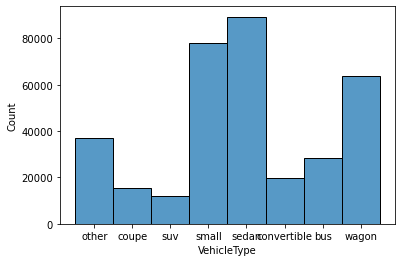

In [12]:
sns.histplot(df['VehicleType'], bins=20)

**Gearbox**

In [13]:
df['Gearbox'].value_counts()

manual    261371
auto       64867
Name: Gearbox, dtype: int64

Заполним пропущенные значения с помощью 'unknown'

In [14]:
df['Gearbox'] = df['Gearbox'].fillna('unknown')

<AxesSubplot:xlabel='Gearbox', ylabel='Count'>

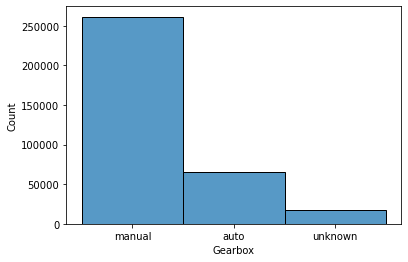

In [15]:
sns.histplot(df['Gearbox'], bins=20)

**Model** 

In [16]:
df['Model'].value_counts()

golf                  28246
other                 23706
3er                   19179
polo                  12628
corsa                 12197
                      ...  
serie_2                   8
rangerover                4
serie_3                   3
range_rover_evoque        2
serie_1                   1
Name: Model, Length: 250, dtype: int64

Заполним пропущенные значения с помощью 'other'

In [17]:
df['Model'] = df['Model'].fillna('other')

**FuelType**

In [18]:
df['FuelType'].value_counts()

petrol      210762
gasoline     97167
lpg           5166
cng            554
hybrid         227
other          170
electric        88
Name: FuelType, dtype: int64

По старой логике запоним с помошью 'other'

In [19]:
df['FuelType'] = df['FuelType'].fillna('other')

<AxesSubplot:xlabel='FuelType', ylabel='Count'>

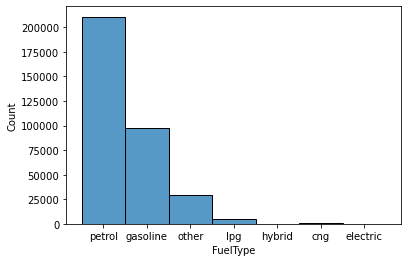

In [20]:
sns.histplot(df['FuelType'], bins=20)

**NotRepaired**

In [21]:
df['NotRepaired'].value_counts()

no     243679
yes     34048
Name: NotRepaired, dtype: int64

In [22]:
df['NotRepaired'] = df['NotRepaired'].fillna('unknown')

<AxesSubplot:xlabel='NotRepaired', ylabel='Count'>

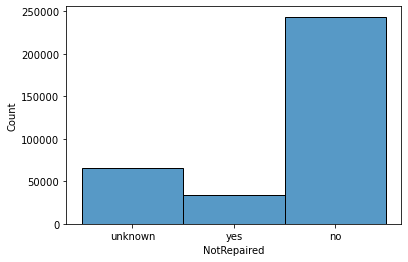

In [23]:
sns.histplot(df['NotRepaired'], bins=20)

**Результат**

In [24]:
print(df.isna().sum())

DateCrawled          0
Price                0
VehicleType          0
RegistrationYear     0
Gearbox              0
Power                0
Model                0
Kilometer            0
RegistrationMonth    0
FuelType             0
Brand                0
NotRepaired          0
DateCreated          0
NumberOfPictures     0
PostalCode           0
LastSeen             0
dtype: int64


**DateCrawled**

In [25]:
df['DateCrawled'].value_counts().sort_index()

2016-03-05 14:06:22    1
2016-03-05 14:06:23    1
2016-03-05 14:06:24    3
2016-03-05 14:06:25    2
2016-03-05 14:06:26    1
                      ..
2016-04-07 14:36:53    1
2016-04-07 14:36:54    1
2016-04-07 14:36:55    1
2016-04-07 14:36:56    1
2016-04-07 14:36:58    1
Name: DateCrawled, Length: 265135, dtype: int64

**RegistrationYear**

In [26]:
df['RegistrationYear'].value_counts().sort_index()

1000    31
1001     1
1039     1
1111     1
1234     4
        ..
8500     1
8888     1
9000     2
9450     1
9999    18
Name: RegistrationYear, Length: 140, dtype: int64

<AxesSubplot:xlabel='RegistrationYear', ylabel='Count'>

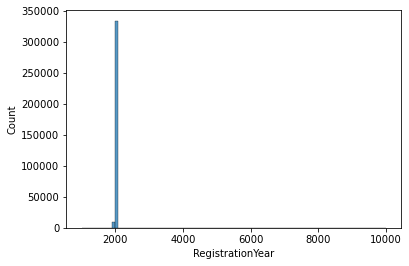

In [27]:
sns.histplot(df['RegistrationYear'], bins=100)

In [28]:
df = df.query('1920 < RegistrationYear < 2016')

In [29]:
df['RegistrationYear'].value_counts().sort_index()

1923       2
1925       1
1927       1
1928       2
1929       7
        ... 
2011    9837
2012    7119
2013    4096
2014    2505
2015    1243
Name: RegistrationYear, Length: 90, dtype: int64

<AxesSubplot:xlabel='RegistrationYear', ylabel='Count'>

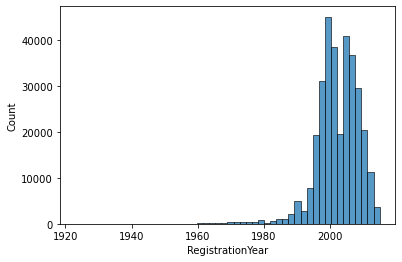

In [30]:
sns.histplot(df['RegistrationYear'], bins=50)

**Power**

In [31]:
df['Power'].value_counts().sort_index()

0        30243
1           25
2            8
3            8
4           30
         ...  
17932        1
19208        1
19211        1
19312        1
20000        1
Name: Power, Length: 672, dtype: int64

Интернет говорит, что максимум для авто находится около 2000 лошадиных сил. Всё что выше можно смело удалить. У менее специфичных авто лошадиные силы могут достигать почти 500 (2022 Ford Super Duty F-350). Поэтому заменим средним всё что выше 500. 

Так же, у нас есть ретро авто. Возьму за эталон Ford Model A. У него около 40 лошадиных сил. Возьму люфт в 10 лошадиных сил. Получается, что всё что меньше 30 заменим средним знаением.

In [32]:
median_p = df['Power'].median()
df.loc[(df['Power'] > 500), 'Power'] = median_p
df.loc[(df['Power'] < 30), 'Power'] = median_p
print(df)

                DateCrawled  Price  VehicleType  RegistrationYear  Gearbox  \
0       2016-03-24 11:52:17    480        other              1993   manual   
1       2016-03-24 10:58:45  18300        coupe              2011   manual   
2       2016-03-14 12:52:21   9800          suv              2004     auto   
3       2016-03-17 16:54:04   1500        small              2001   manual   
4       2016-03-31 17:25:20   3600        small              2008   manual   
...                     ...    ...          ...               ...      ...   
354363  2016-03-27 20:36:20   1150          bus              2000   manual   
354365  2016-03-14 17:48:27   2200        other              2005  unknown   
354366  2016-03-05 19:56:21   1199  convertible              2000     auto   
354367  2016-03-19 18:57:12   9200          bus              1996   manual   
354368  2016-03-20 19:41:08   3400        wagon              2002   manual   

        Power        Model  Kilometer  RegistrationMonth  FuelT

In [33]:
df['Power'].value_counts().sort_index()

30      32
31       7
32       3
33      48
34     171
      ... 
476     31
487      2
489      1
490      1
500     33
Name: Power, Length: 377, dtype: int64

<AxesSubplot:xlabel='Power', ylabel='Count'>

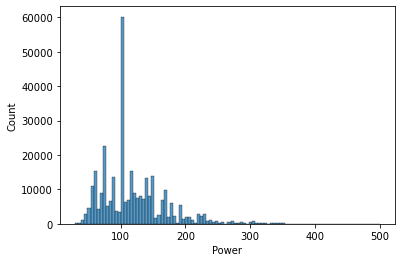

In [34]:
sns.histplot(df['Power'], bins=100)

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 320737 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        320737 non-null  object
 1   Price              320737 non-null  int64 
 2   VehicleType        320737 non-null  object
 3   RegistrationYear   320737 non-null  int64 
 4   Gearbox            320737 non-null  object
 5   Power              320737 non-null  int64 
 6   Model              320737 non-null  object
 7   Kilometer          320737 non-null  int64 
 8   RegistrationMonth  320737 non-null  int64 
 9   FuelType           320737 non-null  object
 10  Brand              320737 non-null  object
 11  NotRepaired        320737 non-null  object
 12  DateCreated        320737 non-null  object
 13  NumberOfPictures   320737 non-null  int64 
 14  PostalCode         320737 non-null  int64 
 15  LastSeen           320737 non-null  object
dtypes: int64(7), object(

In [36]:
df = df.drop(['NumberOfPictures','LastSeen', 'PostalCode', 'DateCrawled', 'RegistrationMonth', 'DateCreated'], axis=1)

## Обучение моделей

Разбиваем на обучающею и на тестовую выборки

In [37]:
target=df['Price']
features=df.drop('Price', axis=1)
features_train, features_test, target_train, target_test = train_test_split(
        features,target, test_size=0.25, random_state=777)

Разбиваем на обучающею и на тестовую выборки для простых моделей

In [38]:
df_ohe = pd.get_dummies(df, drop_first=True)

In [39]:
target_ohe=df_ohe['Price']
features_ohe=df_ohe.drop('Price', axis=1)
features_train_ohe, features_test_ohe, target_train_ohe, target_test_ohe = train_test_split(
        features_ohe,target_ohe, test_size=0.25, random_state=12345)

### Константная модель

In [40]:
predict = predicted_const = pd.Series(target_test.mean(), index=target_test.index)
rmse= mean_squared_error(target_test,predict)**0.5
print('RMSE константной модели: {:.2f}'. format(rmse))

RMSE константной модели: 4565.74


### Линейная регрессия

In [41]:
%%time
liner_reg = LinearRegression()
param = {'fit_intercept' : [True, False], 'normalize' : [True, False], 'copy_X' : [True, False]}
grid = GridSearchCV(liner_reg, param, scoring='neg_mean_squared_error', cv=5)
grid.fit(features_train_ohe, target_train_ohe)
rmse=(-grid.best_score_)**0.5
print('RMSE модели:{:.2f}'.format(rmse))
print('Лучшие гиперпараметры: ', grid.best_params_)

C:\Users\EGO\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\EGO\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type

RMSE модели:2651.14
Лучшие гиперпараметры:  {'copy_X': True, 'fit_intercept': True, 'normalize': False}
Wall time: 1min 23s


### Решающее дерево 

In [45]:
df_ordinal = df
encoder = OrdinalEncoder()
encoder.fit(df_ordinal[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']])
df_ordinal[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']] = encoder.transform(df[['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']])

C:\Users\EGO\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\preprocessing\_encoders.py:110: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  X_int = np.zeros((n_samples, n_features), dtype=np.int)
C:\Users\EGO\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\preprocessing\_encoders.py:111: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.

In [46]:
display(df_ordinal.head())

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,NotRepaired
0,480,3.0,1993,1.0,105,116.0,150000,6.0,38.0,1.0
1,18300,2.0,2011,1.0,190,166.0,125000,2.0,1.0,2.0
2,9800,6.0,2004,0.0,163,117.0,125000,2.0,14.0,1.0
3,1500,5.0,2001,1.0,75,116.0,150000,6.0,38.0,0.0
4,3600,5.0,2008,1.0,69,101.0,90000,2.0,31.0,0.0


In [47]:
target_ordinal=df_ordinal['Price']
features_ordinal=df_ordinal.drop('Price', axis=1)
features_train_ordinal, features_test_ordinal, target_train_ordinal, target_test_ordinal = train_test_split(
        features_ordinal,target_ordinal, test_size=0.25, random_state=12345)

In [48]:
%%time
tr = DecisionTreeRegressor(random_state=777)
param = {'max_depth': range(1, 21, 2)}
grid = GridSearchCV(tr, param, scoring='neg_mean_squared_error', cv=5)
grid.fit(features_train_ordinal, target_train_ordinal)
rmse=(-grid.best_score_)**0.5
print('RMSE модели:{:.2f}'.format(rmse))
print('Лучшие гиперпараметры: ', grid.best_params_)

C:\Users\EGO\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\EGO\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type

RMSE модели:1911.94
Лучшие гиперпараметры:  {'max_depth': 15}
Wall time: 15.3 s


**LightGBM**

In [52]:
df[['VehicleType','Gearbox', 'Model', 'FuelType','Brand','NotRepaired']]= df[['VehicleType', 'Gearbox', 'Model', 'FuelType','Brand','NotRepaired']].astype('category')

In [53]:
target_lgb=df['Price']
features_lgb=df.drop('Price', axis=1)
features_train_lgb, features_test_lgb, target_train_lgb, target_test_lgb = train_test_split(
        features_lgb,target_lgb, test_size=0.25, random_state=777)

In [54]:
%%time
categorial_features = ['VehicleType','Gearbox', 'Model', 'FuelType','Brand','NotRepaired']
lgb=LGBMRegressor(random_state=777, categorial_features=categorial_features)
lgb_params = {'learning_rate':[0.1, 0.3, 0.5, 0.7], 'max_depth': [5, 10, 15],'boosting_type':['gbdt', 'dart', 'goss']}
lgb_grid= GridSearchCV(lgb, lgb_params, scoring='neg_mean_squared_error',  cv=5)
lgb_grid.fit(features_lgb, target_lgb)
rmse=(-lgb_grid.best_score_)**0.5
print('RMSE модели:{:.2f}'.format(rmse))
print('Лучшие гиперпараметры для модели градиентного бустинга: ',lgb_grid.best_params_)

[LightGBM] [Warning] Unknown parameter: categorial_features


C:\Users\EGO\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\model_selection\_split.py:442: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  fold_sizes = np.full(n_splits, n_samples // n_splits, dtype=np.int)
C:\Users\EGO\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\model_selection\_split.py:102: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type

[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: categorial_features
[LightGBM] [Warning] Unknown parameter: 

C:\Users\EGO\anaconda3\envs\praktikum_env_win_new\lib\site-packages\sklearn\model_selection\_search.py:793: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int)


[LightGBM] [Warning] Unknown parameter: categorial_features
RMSE модели:1594.11
Лучшие гиперпараметры для модели градиентного бустинга:  {'boosting_type': 'dart', 'learning_rate': 0.5, 'max_depth': 10}
Wall time: 2min 19s


In [59]:
%%time
lgb_test = LGBMRegressor(categorial_features=categorial_features, learning_rate=0.5,max_depth=10, random_state=777, boosting_type='dart')
lgb_test.fit(features_train_lgb, target_train_lgb)

Wall time: 961 ms


LGBMRegressor(boosting_type='dart',
              categorial_features=['VehicleType', 'Gearbox', 'Model',
                                   'FuelType', 'Brand', 'NotRepaired'],
              class_weight=None, colsample_bytree=1.0, importance_type='split',
              learning_rate=0.5, max_depth=10, min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
              n_jobs=-1, num_leaves=31, objective=None, random_state=777,
              reg_alpha=0.0, reg_lambda=0.0, silent='warn', subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0)

In [60]:
%%time
predictions_lgb=lgb_test.predict(features_test_lgb)

Wall time: 88.1 ms


In [61]:
mse = mean_squared_error(target_test_lgb,predictions_lgb)
print('RMSE для модели LGBM: {:.2f}'.format((mse.mean()**0.5)))

RMSE для модели LGBM: 1592.67


## Анализ моделей

In [64]:
data={'Модель': ['Linear Regression', 'DecisionTree', 'LightGBM'],
     'RMSE кросс-валидации ':['2651.14' , '1911.94' , '1594.11'], 'Результат на тестовой выборке' : ['-', '-', '1592.67'], 'Время поиска параметров' : ['1min 23s', '15.3 s', '2min 19s']}
pivot=pd.DataFrame.from_dict(data)
display(pivot)

,Модель,RMSE кросс-валидации,Результат на тестовой выборке,Время поиска параметров
0,Linear Regression,2651.14,-,1min 23s
1,DecisionTree,1911.94,-,15.3 s
2,LightGBM,1594.11,1592.67,2min 19s


## Вывод

Были протестированы 3 модели. Линейная регрессия, дерево решений и модель градиентного бустинга. 
По результату побеждает модель градиентного бустинга. Но она более требовательна и требуется больше времени. 